In [1]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.12 |Anaconda 4.2.0 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]
scipy: 0.18.1
numpy: 1.11.1
matplotlib: 1.5.3
pandas: 0.18.1
sklearn: 0.17.1


In [2]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Following http://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [4]:
names = ['direction', 'pitch', 'roll', 'yaw']
dataset = pandas.read_csv("../rawsample-munged.csv", names=names, header=1)

In [5]:
# shape
print(dataset.shape)

(1799, 4)


In [6]:
# head
print(dataset.head(20))

   direction  pitch  roll  yaw
0        Top      1     4  -27
1        Top      3    -4  -28
2        Top      3   -15  -28
3        Top      2   -24  -27
4        Top      3   -27  -29
5        Top      3   -29  -30
6        Top      5   -29  -30
7        Top      5   -28  -30
8        Top      5   -27  -29
9      Right      6   -24  -28
10     Right      6   -23  -28
11     Right      5   -22  -27
12     Right      4   -18  -26
13     Right      4   -18  -26
14     Right      4   -17  -25
15     Right      4   -16  -25
16     Right      4   -15  -25
17     Right     -2   -13  -24
18     Right    -25    -2  -20
19    Bottom    -29     3  -19


In [7]:
# descriptions
print(dataset.describe())

             pitch         roll          yaw
count  1799.000000  1799.000000  1799.000000
mean     11.810450     5.959978   -23.665926
std      27.552805    40.106540    15.837892
min     -44.000000  -164.000000  -132.000000
25%      -9.000000   -17.000000   -34.000000
50%      13.000000     8.000000   -24.000000
75%      37.000000    31.000000   -13.000000
max      67.000000   144.000000    33.000000


In [8]:
# class distribution
print(dataset.groupby('direction').size())

direction
Bottom    450
Left      450
Right     450
Top       449
dtype: int64


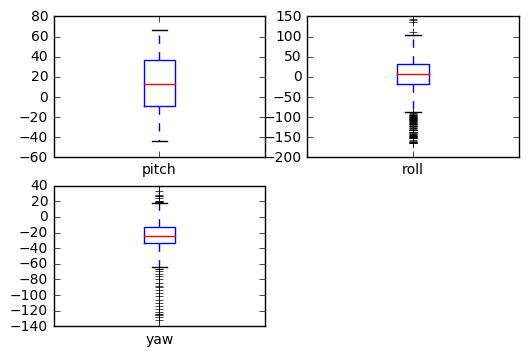

In [9]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

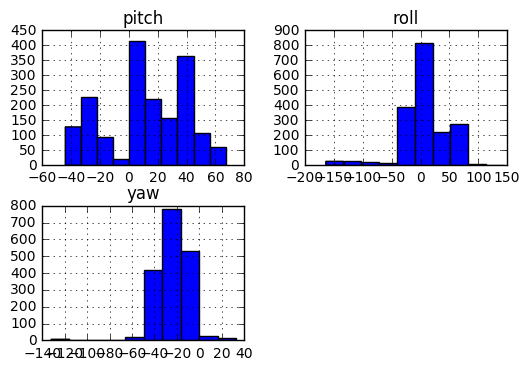

In [10]:
# histograms
dataset.hist()
plt.show()

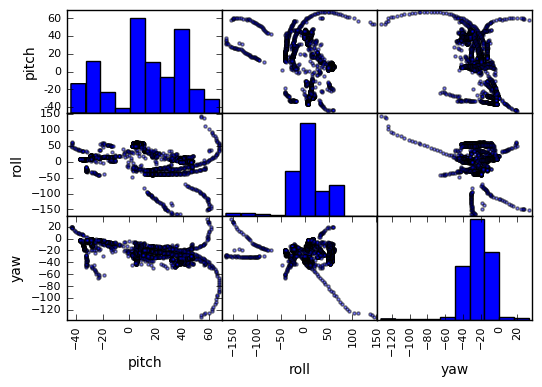

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [13]:
array = dataset.values
X = array[:,1:]
Y = array[:,0]

validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [14]:
print array[:,1:] # Lables
print array[:,0]

[[1L 4L -27L]
 [3L -4L -28L]
 [3L -15L -28L]
 ..., 
 [46L 0L -30L]
 [46L 0L -30L]
 [46L -1L -30L]]
['Top' 'Top' 'Top' ..., 'Left' 'Left' 'Left']


In [15]:
# Split-out validation dataset
array = dataset.values
X = array[:,1:]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [16]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'


In [18]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.583333 (0.180021)
LDA: 0.472222 (0.335640)
KNN: 0.166667 (0.235702)
CART: 0.388889 (0.078567)
NB: 0.083333 (0.117851)
SVM: 0.083333 (0.117851)


In [7]:
from sklearn.externals import joblib
clf = joblib.load('../filename.pkl')

In [17]:
target_names = [u'Top', u'Right', u'Bottom', u'Left']



In [24]:
target_names[clf.predict([-13,-10,3])]

u'Right'